<a href="https://colab.research.google.com/github/YogithL/Data-Science/blob/main/Unit7ExercisesSF_ipynb_YL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import pymc as pm
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-0l348buk
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-0l348buk
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Many real-world relations are non-linear, using polynomial elements will allow you to better approximate curves. Though they work better for complex data sets, they can potentially overfit the data if the degrees increase to much. In general we should lean toward simpler models that have a loose, but accurate fit.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

First off, if a model exhibits linear relations, a polynomial element would be extraneous and likely result in overfitting. Additionally, as the number of degrees increases, the interpretability of the model erodes; in contexts where this is critical, the trade-off between accuracy and interpretability may not be worth it. Lastly, polynomial models tend to loose speed as they grow in complexity, and in certain enviroments, this might not be acceptable.  

**Task3**:

What's the point of using b splines?

B-splines are used because they provide the flexibilty of polynomial regression without overfitting. Additionally, they have the advantange of being able to modify curves locally without affecting the whole. This can be useful when you need to adjust one part of the curve with a different relationship to your variable than the rest.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

The Gaussian Process assigns a knot to each data point then attempts to find a relationship between them all. It measures the degree of "closeness" between each knot, similar to a NN, to find intrinsic patterns in the data instead of trying to define curve segments.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [21]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [22]:
num_knots = 6
knots = np.linspace(53.975, 190, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


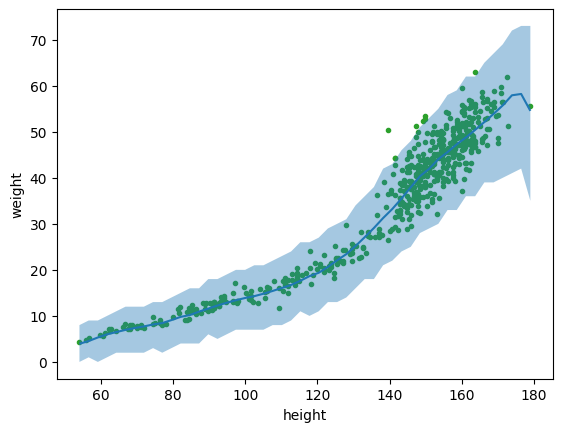

In [23]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that wrapping the mean function inside of a **Mean object** makes it easier to use other Gaussian process functionalities like the .conditional and .predict methods.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

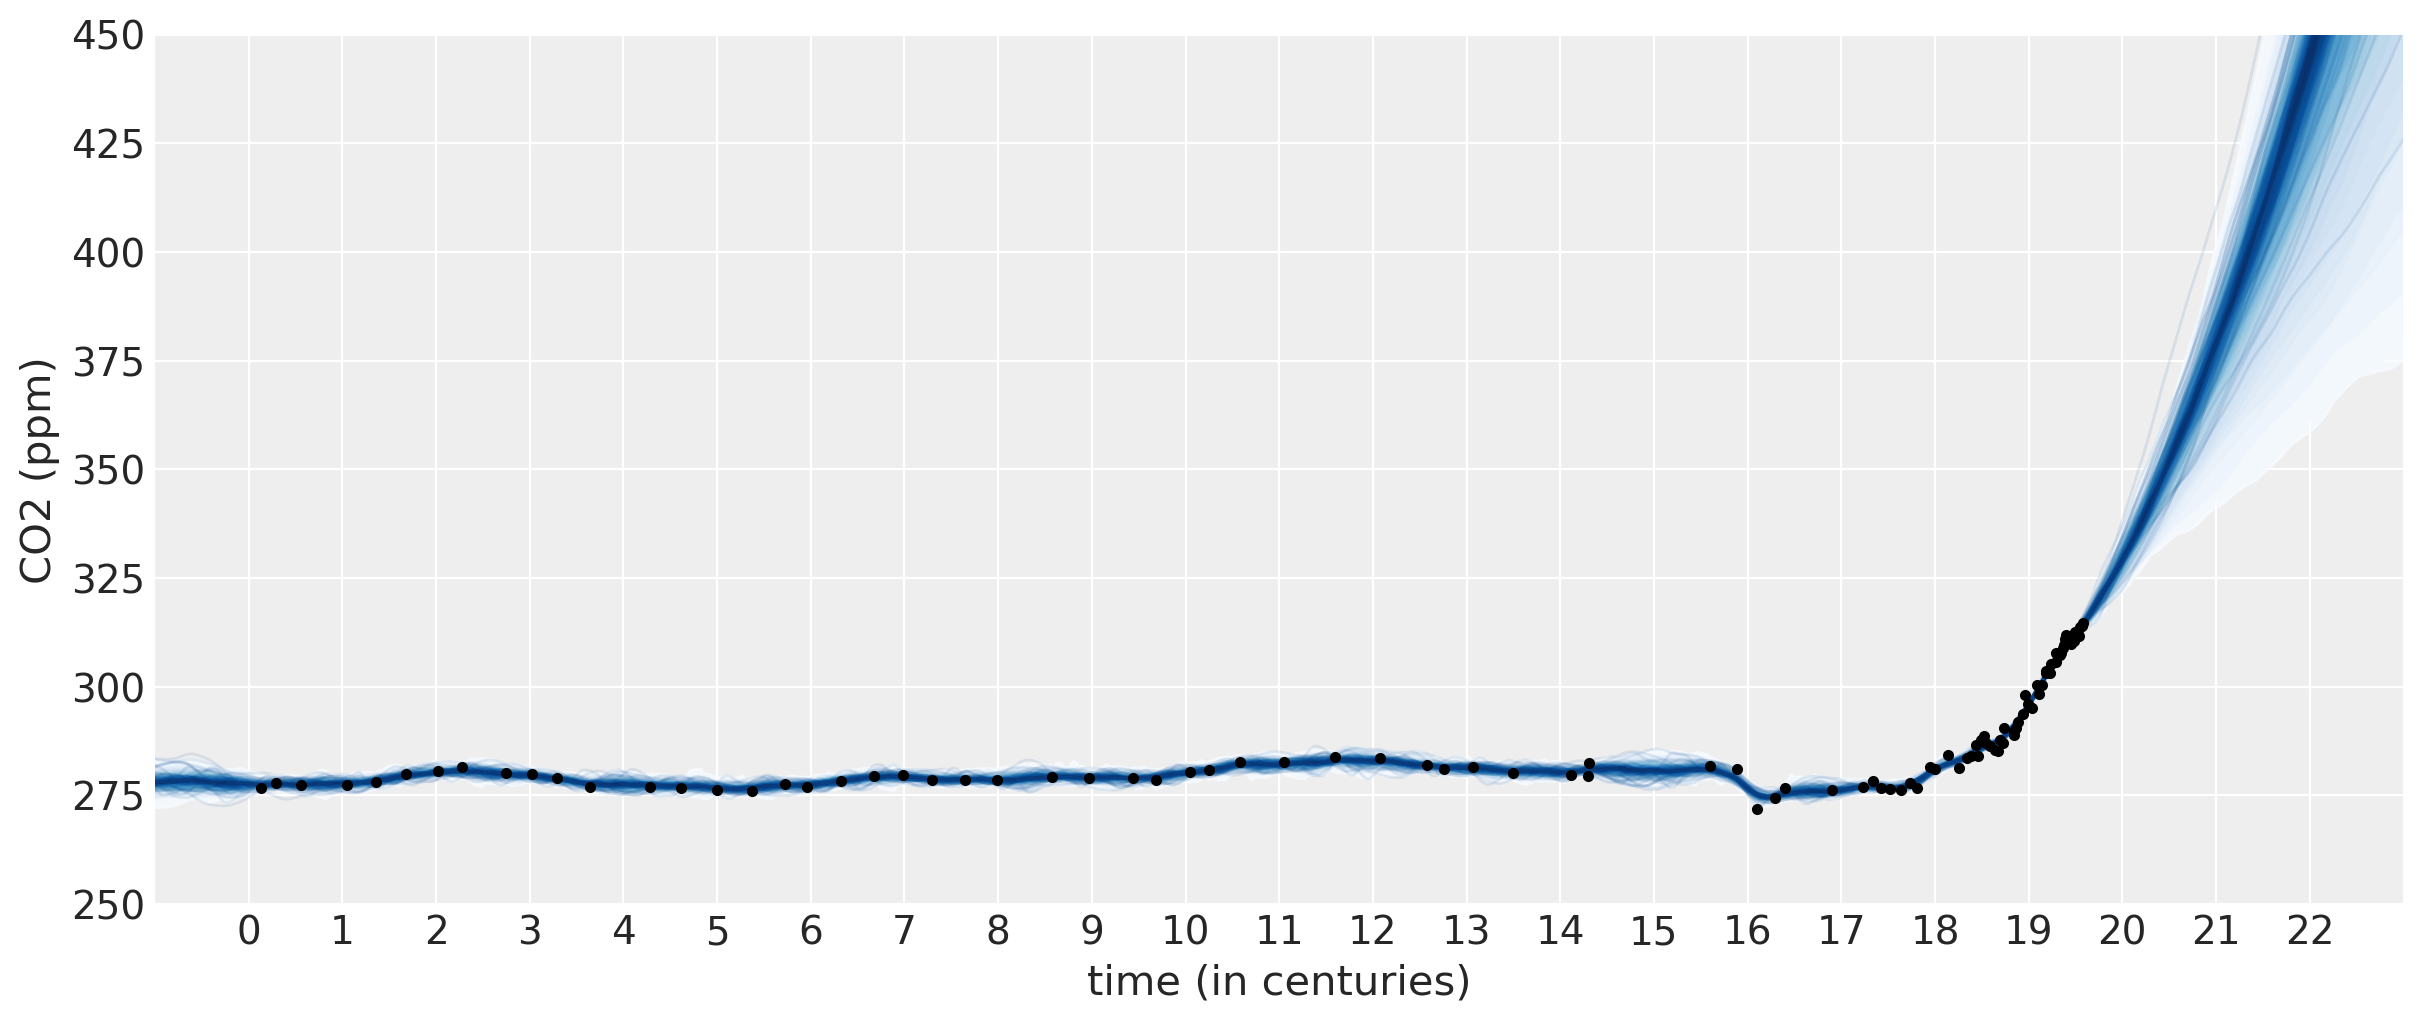

The graph above is my favorite because up to the 18th century, the curve has a slope of zero before transitioning into a positive one. This reminds me of B-splines and how they piece together different curves to fit the distribution. Also, I think the color scheme gives the curve a stream like appearance that looks cool.